# WHATSAPP GROUP ANALYSIS OF DSN PH-CITY AI+ COMMUNITY 

**<h2>Author:</h2>**  <h3>Gspel Orok</h3>
   - Community Lead,
    -  Port Harcourt City
      -  Data Science Nigeria /Data Scientists Network (DSN)

<h3>Introduction:</h3

DSN PH-City Community is data scientists network/Data Science Nigeria AI+ community .it is a platform for all young in heart individuals within port harcourt rivers state who are passionate about AI and the data driven ecosystem.
This community cut across beginners, intermediates and professionals irrespective of your tribe, affiliation or religion.

The general aim of the community is to promote the goals and vision of DSN which is to  build a world class Artificial Intelligence talents and ecosystem.

<h3> As a Community Why We Chose Whatsapp Platform for our Community Group Activities </h3>

We chose WhatsApp group because of the past performance feedback we had. We initially started using Slack platform for our community engagements. <br>

At some point we discovered that many of our community members were not comfortable and familiar with the platform. Especially in navigating through the various channels and threads. Only few were able to work on the platform.<br> 

Subsequently, since we already had a whatsapp group and most of our community information was being circulated on the platform. We discovered that members were much active on WhatsApp and reachable than on the previous platform. Whatsapp is the most important app with about 2 billion users. It's possible to stay away from other social media apps such as Instagram/Facebook/Quora/telegram/even youtube, but not WhatsApp especially within the Nigerian environment. <br>

There are other several reasons to point to this also. It's features are free and fast in a layman's language.
It's fun to interact with them. Since most users have their family and friends there, college groups, church groups. Sometimes it feels nice to interact with them and cherish the old memories. Also many Working people have their official groups in Whatsapp too. I think 50% of it users because of it prompt and effectiveness are used to going through their whatsapp first thing after bed.

It has been effective and very important to the community. Most of the activities carried out by members on the group. How effective it has been.

This Article provides a great way of playing with whatsapp dataset by utilzing your data manipulation skills.This also help in applying some data cleaning techniques, working with different file formats such as csv, txt, handling time stamp data, applying Visualization techniques and finally aiding in decision making.


DSN PH City Community have a whatsapp group with more than 90 persons on the group where most of the community engagements and activities are being carried out.<br>
Considering the fact that whatsapp is one of the most used social media platform with over 2billion Users. This fact also relates to the huge amount of data generated daily, more than 65 billion messages are sent on WhatsApp daily. As Data analysts and scienctists,we know data is the new crude oil which can be processed to derive useful insights for better decision making. <br>
We can use WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. A lot of information from whatsapp chats and group can help solve even problems.


**The analysis is to find the following key insights about the group:**
1. Get the dataset ready
2. Size of the Dataset
3. Visualize yearly performance of the group
4. Visualize monthly performance of the group for 2022
5. Total number of contacts on the group
6. Get Size of Dataset based on dates from June to July 2022
7. The total message showing activities on group for the June & July 2022 period.
8. Top 10 Active Members
9. 10 Least Active Members
10. Visualize the most used word by members of the group with word cloud and yourself or any other member
11. Optional: sentiment Analysis

<h3> Now lets run through the steps for the Analysis:</h3>

# 1. Getting the Dataset

**To extract your WhatsApp chats, just open any chat with group and follow the steps mentioned below:**

- If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.<br>
- Then scroll to the bottom and tap on Export Chat.<br>
- Then select without media for simplicity if it asks you whether you want your chats with or without media.<br>
- Then email the chat txt file to yourself and download it to your system.<br>

- This is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis.

- **Now let’s start this task by importing the necessary Python libraries that we need for this task:**

In [1]:
#pip install regex
#pip install emoji
#pip install wordcloud
#pip install textblob
#pip install nltk

In [2]:
import pandas as pd #for data manipulation 
import numpy as np
import matplotlib.pyplot as plt #for visualization 
import plotly.express as px #for visualization 
import seaborn as sns #for visualization 
import regex #for text extraction 
import emoji
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #for word cloud 
from textblob import TextBlob # for sentiment analysis

The dataset we are using here requires a lot of preparation, so let's get some codes that will help us prepare the dataset:

# Data Extraction 

Since the data is in txt format we need to make use of regex scripts to aid our data extraction.

In [3]:
# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False
# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    # Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

**Now let’s import the data and prepare it in a way that we can use it in a pandas DataFrame:**

In [4]:
# let's track the data into a list for Pandas dataframe
data = []
conversation = 'WhatsApp Chat with AI+ PH.txt' #Chat downloaded from community group
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [5]:
# Load to pandas df
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author','Message'])

# Convert date to pandas datetime
df['Date'] = pd.to_datetime(df['Date'])

# Data Transformation 

# 2. Size of the Dataset and other necessary information about the dataset 

In [6]:
df.shape[0]

3252

In [7]:
#Displaying data, using df.head() 
df.head()

Date      Time Author  \
0 2020-02-11   9:36 PM   None   
1 2020-02-22   9:11 PM   None   
2 2020-02-24  10:49 AM   None   
3 2020-02-24  11:48 AM   None   
4 2020-02-24  12:07 PM   None   

                                             Message  
0           +234 814 787 0497 created group "AI+ PH"  
1                     +234 814 787 0497 added Gosbot  
2          +234 814 787 0497 added +234 813 199 3608  
3          +234 814 787 0497 added +234 705 789 9599  
4  +234 814 787 0497 added Cummi DSN, +234 706 05...

In [8]:
#you can create year, month,day columns
import datetime as dt
# Generate Year colum
df['Year'] = df['Date'].dt.year
# Generate Month colum 
df['Month'] = df['Date'].dt.month
# Generate day colum 
df['Day'] = df['Date'].dt.day

In [9]:
#you can rename or replace observations
df['Month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',10:'October', 11:'November', 12:'December'}, inplace=True)

In [10]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 7 columns):
Date       3252 non-null datetime64[ns]
Time       3252 non-null object
Author     2727 non-null object
Message    3252 non-null object
Year       3252 non-null int64
Month      3252 non-null object
Day        3252 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 178.0+ KB


In [11]:
#let's find out if we have duplicates of values
df.duplicated().sum()

18

In [12]:
#Let's check the data type
df.dtypes

Date       datetime64[ns]
Time               object
Author             object
Message            object
Year                int64
Month              object
Day                 int64
dtype: object

In [13]:
#Checking Null Values
print(df.count().sort_values())

Author     2727
Date       3252
Time       3252
Message    3252
Year       3252
Month      3252
Day        3252
dtype: int64


In [14]:
#finding % of missing values for each column
df.isnull().sum()*int(100/len(df))

Date       0
Time       0
Author     0
Message    0
Year       0
Month      0
Day        0
dtype: int64

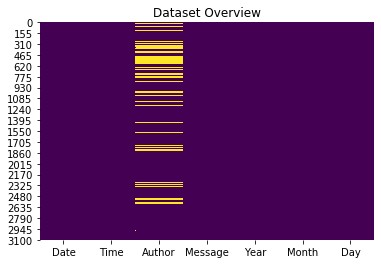

In [15]:
#To visualize missing or null values in the dataset

#import seaborn as sns
sns.heatmap(df.isnull(),cbar=False, cmap="viridis").set_title("Dataset Overview")
plt.show()

In [16]:
#you can drop null values, 
df = df.dropna()

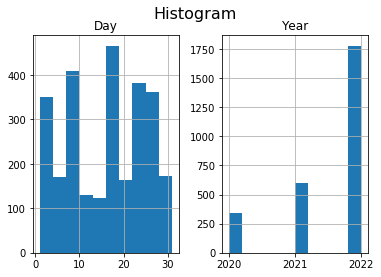

In [17]:
df.hist()
plt.suptitle("Histogram", fontsize=16)
plt.show()

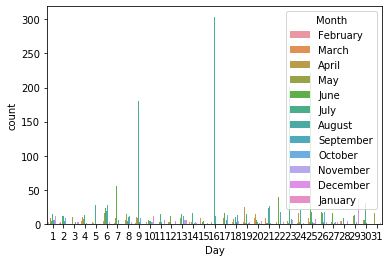

In [18]:
#let's see how the different locations relate with rain tomorrow
sns.countplot(x = "Day" , hue = "Month", data = df);

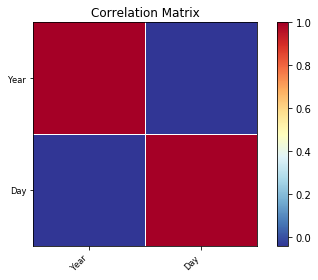

In [19]:
#let's visualize to see how the different features correlate
corr = df.corr(method='pearson')
corr

import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [20]:
df.describe()

Year         Day
count  2727.000000  2727.00000
mean   2021.525853    15.40374
std       0.708901     8.60890
min    2020.000000     1.00000
25%    2021.000000     8.00000
50%    2022.000000    16.00000
75%    2022.000000    23.00000
max    2022.000000    31.00000

In [21]:
df_pivot=pd.pivot_table(df, values='Day', columns=['Date'])
df_pivot

Date  2020-02-24  2020-02-28  2020-03-04  2020-03-05  2020-03-06  2020-03-07  \
Day           24          28           4           5           6           7   

Date  2020-03-09  2020-03-10  2020-03-13  2020-03-14  ...  2022-07-22  \
Day            9          10          13          14  ...          22   

Date  2022-07-23  2022-07-25  2022-07-26  2022-07-27  2022-07-28  2022-07-29  \
Day           23          25          26          27          28          29   

Date  2022-07-30  2022-08-01  2022-08-02  
Day           30           1           2  

[1 rows x 290 columns]

In [22]:
#Filling the Mean, median and mode values for missing values in a specific column:
#df['Day'].fillna(0,inplace=True)

In [23]:
#Filling the Mean, median and mode values for missing values in all columns:
#df.fillna(df.mean(),inplace=True)
#df.fillna(df.mode(),inplace=True)
#df.fillna(df.median(),inplace=True)

In [24]:
#droping
#df.drop(['Date'],axis=1,inplace= True) 

**Our dataset is completely ready now for the task of WhatsApp chat analysis with Python.** <br>

- Now let’s have a look at the first 7 and last 7 messages and some other insights from the data:

In [25]:
df.head(7)

Date      Time             Author  \
5  2020-02-24  12:08 PM  +234 814 787 0497   
7  2020-02-24  12:48 PM  +234 814 787 0497   
9  2020-02-28   8:26 PM            ADEBAYO   
10 2020-02-28   8:53 PM            ADEBAYO   
11 2020-02-28   9:10 PM            ADEBAYO   
12 2020-02-28   9:15 PM            ADEBAYO   
13 2020-03-04  12:18 PM            ADEBAYO   

                                              Message  Year     Month  Day  
5   Hi everyone.  First, I want to apologise for n...  2020  February   24  
7                                     <Media omitted>  2020  February   24  
9   Hi everyone. I hope we all had a wonderful wee...  2020  February   28  
10  I have been getting messages on if the class w...  2020  February   28  
11  *Kindly note that the class tomorrow is only f...  2020  February   28  
12  *Port Harcourt School of AI will be coming to ...  2020  February   28  
13  Hi everyone. How are we all doing?  If you did...  2020     March    4

In [26]:
df.tail(7)

Date      Time             Author  \
3245 2022-08-02   7:29 AM             Jacia_   
3246 2022-08-02   7:46 AM       $Gospel Orok   
3247 2022-08-02  12:23 PM         adeseyison   
3248 2022-08-02  12:26 PM         adeseyison   
3249 2022-08-02  12:29 PM         adeseyison   
3250 2022-08-02  12:39 PM  Emmanuel Boniface   
3251 2022-08-02  12:49 PM             Jacia_   

                                                Message  Year   Month  Day  
3245  That’s just one unique stuff it does amidst ot...  2022  August    2  
3246                      I guess this is helpful... 👍🏽  2022  August    2  
3247  Good morning sir and all,  I stopped at matplo...  2022  August    2  
3248  Often times,  The values that falls within the...  2022  August    2  
3249  Even Excel! Can do web scraping_ majorly on we...  2022  August    2  
3250                                           Waoow🤯..  2022  August    2  
3251              Wow!!!   Seeing it for the first time  2022  August    2

In [27]:
df.to_csv('DSN_ph.csv',index =False)

# 3. Yearly performance of the group

Text(0.5, 1.0, 'Chat count per year')

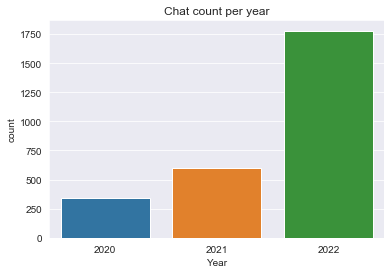

In [28]:
#you visualize yearly performance of the group
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid' )

sns.countplot(df.Year).set_title('Chat count per year')

# 4. Monthly performance of the group for 2022

Text(0.5, 1.0, 'Chat count per Month')

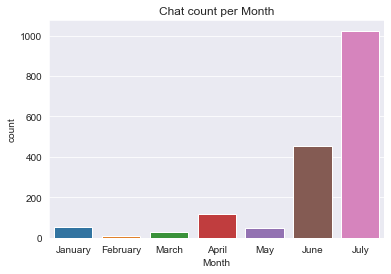

In [29]:
#you visualize monthly performance of the group for 2022
df_pm=df.loc[(df['Date']>='2022-01-01')&(df['Date']<'2022-08-01')]

sns.set_style('darkgrid' )

sns.countplot(df_pm.Month).set_title('Chat count per Month')


In [30]:
#this count will be used for community progress chart

count_df_date=df['Date'].value_counts().rename_axis('unique_dates').reset_index(name='counts')
#count_df_date

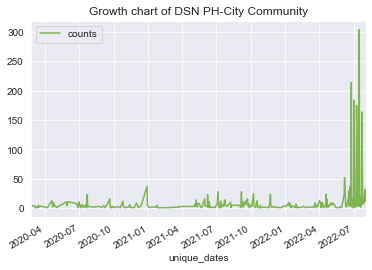

<Figure size 720x360 with 0 Axes>

In [31]:
#Date,month,year and days performance growth chart
%matplotlib inline 
c='#7eb54e'
count_df_date.plot(x='unique_dates',y='counts', kind='line', color=c, title ='Growth chart of DSN PH-City Community')
#plt.rcParams['figure.figsize']=[50,50]

plt.figure(figsize=(10,5))

plt.show()

# 5. Total number of contacts on the group

In [32]:
df.Author.unique()

array(['+234 814 787 0497', 'ADEBAYO', '$Gospel Orok',
       '+234 810 409 7269', '+234 907 815 8983', 'Aimar🤓 Emmanuel',
       'Kenneth Odoemenam', '+234 705 789 9599', 'Enos Michael Ope',
       'Funminiyi', '+234 905 887 8813', '+234 708 282 8150',
       '+234 813 434 7014', '+234 813 199 3608', '+234 816 648 5448',
       'Anita DSN AI+', 'Destiny Fullstack', 'Franklin Obasi',
       'Tosin Samuel Jay', '+234 706 482 5368', 'Esther Edoho',
       'Ginika Chinonso Francis', '+234 806 493 2735', 'Bright',
       '+234 703 017 6676', '+234 816 602 5642', '+234 810 408 6552',
       '+234 706 464 3074', 'Muogbo chinemeerem', '+234 703 360 4777',
       '+234 810 282 8226', '+234 816 059 0910', 'Evans 💫', 'Cummi DSN',
       '+234 806 352 3755', '+234 905 759 6155', '+234 803 423 4868',
       'Joy Nwaiwu', 'Victor Ayo', '+234 806 868 7979',
       '+234 803 668 8333', '+234 814 369 3851', 'Michael Franklin',
       '+234 703 864 2087', '+234 814 837 5121', '+234 906 281 0407',
     

In [33]:
df.Author.nunique()

86

In [34]:
#or use len in pandas #un=len(pd.unique(df['Author']))
len(pd.unique(df['Author']))

86

# 6. Dataset from June  to July 2022

In [35]:
#to filter dataset based on dates from June  to July 2022

df=df.loc[(df['Date']>='2022-06-01')&(df['Date']<'2022-08-01')]
df

Date     Time                   Author  \
1594 2022-06-06  3:29 PM             $Gospel Orok   
1595 2022-06-06  9:07 PM             $Gospel Orok   
1596 2022-06-06  9:09 PM             $Gospel Orok   
1597 2022-06-06  9:18 PM           Oshimua Victor   
1598 2022-06-06  9:31 PM             $Gospel Orok   
...         ...      ...                      ...   
3201 2022-07-30  8:24 PM             $Gospel Orok   
3203 2022-07-30  8:33 PM  Ginika Chinonso Francis   
3204 2022-07-30  8:35 PM             $Gospel Orok   
3205 2022-07-30  8:36 PM  Ginika Chinonso Francis   
3206 2022-07-30  8:37 PM             $Gospel Orok   

                                                Message  Year Month  Day  
1594  *Hack and Win Nvidia DLI Scholarship in the FR...  2022  June    6  
1595                           Good evening Guys.. 🙌🏻🙌🏻  2022  June    6  
1596  I am trying to understand the difference betwe...  2022  June    6  
1597  In my own understanding, Feature engineering c...  2022  June    6  
1598  This means data preprocessing is a subset of F...  2022  June    6  
...                                                 ...   ...   ...  ...  
3201  I want us to get busy with this project... On ...  2022  July   30  
3203  Sir, is it ok to use python scripts instead of...  2022  July   30  
3204  😑You can but jupyter notebook is cool for anal...  2022  July   30  
3205                                             Ok Sir  2022  July   30  
3206  📌We are all expected to give this project a tr...  2022  July   30  

[1477 rows x 7 columns]

In [36]:
#to sort values in the data\Frame to improve readability 
df.sort_values("Date",ascending=False)

Date      Time          Author  \
3206 2022-07-30   8:37 PM    $Gospel Orok   
3192 2022-07-30   8:19 PM      Jamin DSN    
3180 2022-07-30  10:03 AM    $Gospel Orok   
3181 2022-07-30   9:59 AM      Lolade DSN   
3182 2022-07-30   9:59 AM      Lolade DSN   
...         ...       ...             ...   
1613 2022-06-06  10:57 PM  Oshimua Victor   
1614 2022-06-06  10:59 PM    $Gospel Orok   
1615 2022-06-06  11:00 PM    $Gospel Orok   
1616 2022-06-06  11:00 PM  Oshimua Victor   
1594 2022-06-06   3:29 PM    $Gospel Orok   

                                                Message  Year Month  Day  
3206  📌We are all expected to give this project a tr...  2022  July   30  
3192                                       Good evening  2022  July   30  
3180                                    <Media omitted>  2022  July   30  
3181  It is today!  Get ready to dive into AI tools ...  2022  July   30  
3182                                    <Media omitted>  2022  July   30  
...                                                 ...   ...   ...  ...  
1613  For example, we have a column of dog breed whi...  2022  June    6  
1614                                            ❤️🎊🎊🎊🎊😅  2022  June    6  
1615                Accuracy score is 0.1 bro thanks 👍🏽  2022  June    6  
1616                                                 🤣🫡  2022  June    6  
1594  *Hack and Win Nvidia DLI Scholarship in the FR...  2022  June    6  

[1477 rows x 7 columns]

# 7. Activities on the group between June & July 2022:

Number of Active members in June and July 2022.

In [37]:
df.Author.nunique()

37

Now let’s have a look at the total data size between this months:

In [38]:
total_data_size = df.shape[0]
print(total_data_size)

1477


Now let's look at number of messages sent without media

In [39]:
total_messages = df[df["Message"]!='<Media omitted>'].shape[0]

In [40]:
print(total_messages)

1424


Now let’s have a look at the total number of media messages present in the group:

In [41]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

53


Now let’s extract the emojis present in between the chats and have a look at the emojis present in the group:

In [42]:
def split_count(text):
    emoji_list = []
    
    df = regex.findall(r'\X',text)
    for word in df:
        emoji_list.append(word)
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

86263


Now let’s extract the URLs present in this chat and have a look at the final insights:

In [43]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
links

19

In [44]:
print("Group activities between June and July 2022")
print('Number of Active members:', df.Author.nunique())
print("Total Data Size: ", total_data_size)
print("Total Messages:",total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared:", emojis)
print("Number of Links Shared:", links)

Group activities between June and July 2022
Number of Active members: 37
Total Data Size:  1477
Total Messages: 1424
Number of Media Shared:  53
Number of Emojis Shared: 86263
Number of Links Shared: 19


<h3>Now let’s prepare this data to get more insights to analyze all the messages sent in this chat in more detail:</h3>

In [45]:
#to grab the unique contacts
unique_numb=df.Author.unique()
l=unique_numb.tolist()
#or l = ['Emmanuel Boniface','Oshimua Victor','Christian Ajulor','Evans 💫','Florence Egwrudje','Jacia_','Tochi ErUdItE']

In [46]:
#to prepare and preprocess messages 
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [47]:
action_dict=[]
for i in range(len(l)):
  #Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]  #req_df will contain messages of only one particular user
  namem=l[i]   #to get names or each contact in the list
  messag_sent=req_df.shape[0] #shape will print number of rows which indirectly means the number of messages
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0] #media conists of media messages
  emojis = sum(req_df['emoji'].str.len())#emojis consists of total emojis
  links = sum(req_df["urlcount"])     #links consist of total links
  #to append or add variables to empty list
  action_dict.append([namem,messag_sent,int(words_per_message),media,emojis,links])

In [48]:
#to view list of the captured values to active_list

In [49]:
active_list = pd.DataFrame(action_dict, columns=['names','messages_sent','words_average',"Media","Emojis","Links"])

#finding total count
active_list['Total']=active_list['messages_sent']+active_list['words_average']+active_list['Media']+active_list['Emojis']+active_list['Links']
#or,active_list['Total']=active_list[['names','messages',"Media","Emojis","Links"]].sum(axis=1)

In [50]:
#sort by descending order 
list=active_list.sort_values(by=['Total'],ascending=False)
list

names  messages_sent  words_average  Media  Emojis  \
0                 $Gospel Orok            510             16     31   49226   
5                 Lukman Idris            215              6      0    8364   
2            Emmanuel Boniface            135             10      2    7700   
1               Oshimua Victor            140              7      4    5239   
11               Tochi ErUdItE             76              5      2    2161   
18              Franklin Obasi             16             15      1    1369   
24           Florence Egwrudje             74              3      0    1004   
19                  adeseyison             10             20      0    1049   
14                Esther Edoho             22              8      2     958   
13                      Jacia_             13              7      2     666   
3            Ebenezer Justice              27              4      0     616   
20            Michael Franklin              5             23      0     605   
36                  Lolade DSN              2             51      1     575   
28     Ginika Chinonso Francis             19              6      0     574   
21              Jammal Adeyemi              1             70      0     518   
4             Christian Ajulor             45              2      1     513   
17                     Evans 💫             47              2      5     463   
9                Anita DSN AI+              1             77      0     418   
35                   Funminiyi              1             65      0     412   
34                 Donvictor😍😍              8              9      2     420   
6   Abdulsalam Abimbola Farouk             10              7      0     421   
22                      Bright             14              5      0     358   
27                  Jamin DSN               7              8      0     305   
31                       STEVE              1             43      0     271   
7            +234 813 294 1110              1             35      0     192   
10           +234 703 017 6676              3             10      0     212   
32                     Raphael              3             13      0     192   
15           +234 816 059 0910              1             29      0     168   
12            Tosin Samuel Jay              5              6      0     151   
26                  Chinagorom              5              4      0     110   
29           +234 813 492 5452              1             10      0      68   
16           +234 803 423 4868              1             10      0      49   
30                  Joy Nwaiwu              1             10      0      47   
33                         Iby              1              9      0      42   
23                      Danita              1              2      0      18   
8            +234 903 657 0339              1              2      0      12   
25           +234 811 675 9346              1              1      0       2   

    Links  Total  
0      11  49794  
5       0   8585  
2       1   7848  
1       0   5390  
11      0   2244  
18      0   1401  
24      0   1081  
19      0   1079  
14      0    990  
13      1    689  
3       0    647  
20      0    633  
36      2    631  
28      0    599  
21      2    591  
4       0    561  
17      0    517  
9       0    496  
35      2    480  
34      0    439  
6       0    438  
22      0    377  
27      0    320  
31      0    315  
7       0    228  
10      0    225  
32      0    208  
15      0    198  
12      0    162  
26      0    119  
29      0     79  
16      0     60  
30      0     58  
33      0     52  
23      0     21  
8       0     15  
25      0      4

You can drop a value you don't intend to include 

In [51]:
#list.drop(list.index[list['names']=='$Gospel Orok'],inplace=True)

#or list=list[list['names']!='$Gospel Orok']

<h3>Let's output our dataset to csv file</h3>

In [52]:
list.to_csv('DSN_PH_City_dataset_June_July_2022.csv', index =False, header=True)

<h3>Let's have a Visual view of our analysis </h3>

In [53]:
#ploting barchart horizontally for all members
import plotly.express as px
list=list.sort_values(by=['Total'],ascending=False)
fig1=px.bar(list,x='Total',y='names', color='names',title='June & July 2022 Members Performance on the group')
fig1.show()

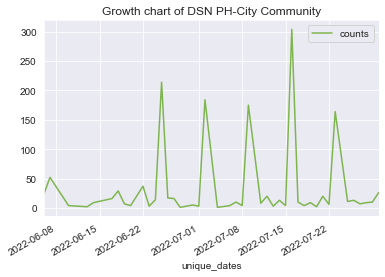

<Figure size 720x360 with 0 Axes>

In [54]:
#this count will be used for community progress chart

df_date=df['Date'].value_counts().rename_axis('unique_dates').reset_index(name='counts')
#count_df_date

#Date,month,year and days performance growth chart
%matplotlib inline 
c='#7eb54e'
df_date.plot(x='unique_dates',y='counts', kind='line', color=c, title ='Growth chart of DSN PH-City Community')
#plt.rcParams['figure.figsize']=[50,50]

plt.figure(figsize=(10,5))

plt.show()

# 8. Top 10 Active Members

In [55]:
top_list=list.head(10)
top_list

names  messages_sent  words_average  Media  Emojis  Links  \
0        $Gospel Orok            510             16     31   49226     11   
5        Lukman Idris            215              6      0    8364      0   
2   Emmanuel Boniface            135             10      2    7700      1   
1      Oshimua Victor            140              7      4    5239      0   
11      Tochi ErUdItE             76              5      2    2161      0   
18     Franklin Obasi             16             15      1    1369      0   
24  Florence Egwrudje             74              3      0    1004      0   
19         adeseyison             10             20      0    1049      0   
14       Esther Edoho             22              8      2     958      0   
13             Jacia_             13              7      2     666      1   

    Total  
0   49794  
5    8585  
2    7848  
1    5390  
11   2244  
18   1401  
24   1081  
19   1079  
14    990  
13    689

# 9. 10 Least Active Members 

In [56]:
least_1ist=list.tail(10)

In [57]:
least_1ist

names  messages_sent  words_average  Media  Emojis  Links  \
15  +234 816 059 0910              1             29      0     168      0   
12   Tosin Samuel Jay              5              6      0     151      0   
26         Chinagorom              5              4      0     110      0   
29  +234 813 492 5452              1             10      0      68      0   
16  +234 803 423 4868              1             10      0      49      0   
30         Joy Nwaiwu              1             10      0      47      0   
33                Iby              1              9      0      42      0   
23             Danita              1              2      0      18      0   
8   +234 903 657 0339              1              2      0      12      0   
25  +234 811 675 9346              1              1      0       2      0   

    Total  
15    198  
12    162  
26    119  
29     79  
16     60  
30     58  
33     52  
23     21  
8      15  
25      4

In [58]:
#sum down vertical column of all activities

active_list.sum(axis=0)

names            $Gospel OrokOshimua VictorEmmanuel BonifaceEbe...
messages_sent                                                 1424
words_average                                                  610
Media                                                           53
Emojis                                                       85468
Links                                                           19
Total                                                        87574
dtype: object

In [59]:
#active_list.groupby(['names'])['messages_sent','words_average','Media','Emojis'].sum()

**Now let’s prepare a visualization of the group. It will help in understanding the group performance also:**

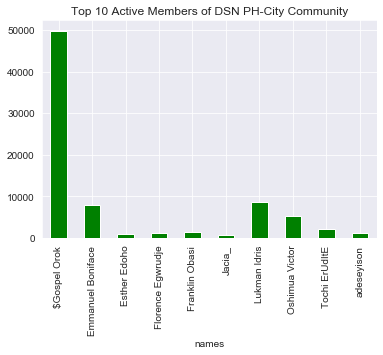

In [60]:
vl=top_list.groupby('names')['Total'].sum()
vl.plot(kind='bar', color='green',title ='Top 10 Active Members of DSN PH-City Community')
plt.show()

In [61]:
#pie chart for showing the top list
#import plotly.express as px

fig = px.pie(top_list, values='Total', names='names', title="Top 10 Active members of DSN PH-City Community")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [62]:
#ploting barchart horizontally
top_list=top_list.sort_values(by=['Total'],ascending=False)
fig1=px.bar(top_list,x='Total',y='names', color='names',title='Top 10 Active members on the group')
fig1.show()

# 10. Visualizing a word cloud

Now let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 87162 words in all the messages.


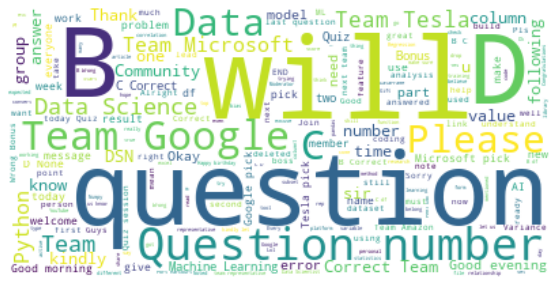

In [63]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most used words by each person by visualizing two different word clouds:

Author Name: Oshimua Victor


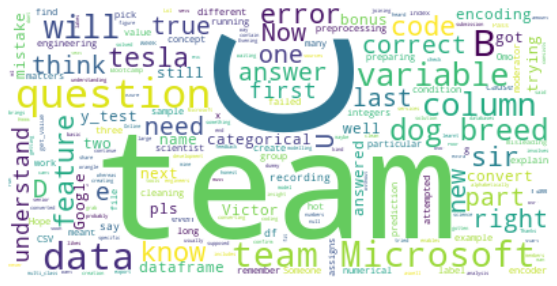

Author Name: Emmanuel Boniface


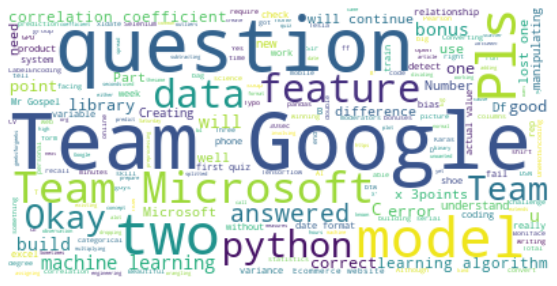

Author Name: Florence Egwrudje


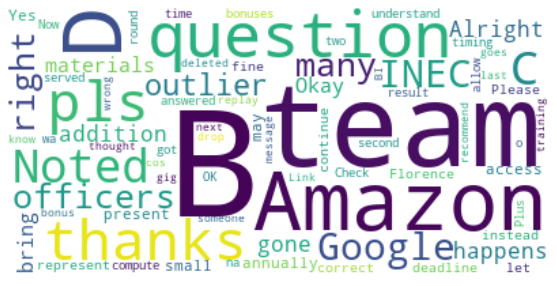

Author Name: Evans 💫


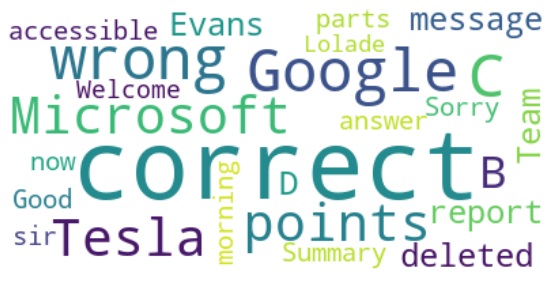

Author Name: Tochi ErUdItE


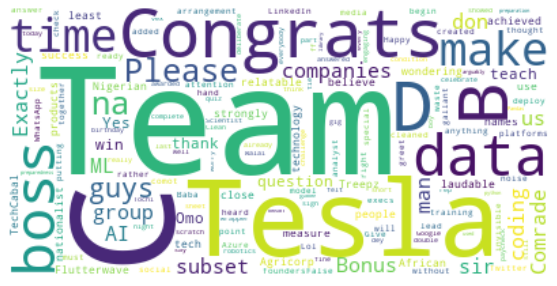

Author Name: Jacia_


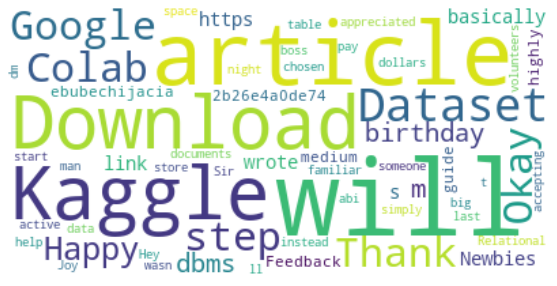

In [64]:
l = ['Oshimua Victor', "Emmanuel Boniface",'Florence Egwrudje','Evans 💫', 'Tochi ErUdItE','Jacia_']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author Name:',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

.

# OPTIONAL: Sentiments Analysis

<h3>Now here is how we can analyze the sentiments of WhatsApp chat using Python:</h3>

In [65]:
#import necessary nltk libraries for text processing 
import nltk
import re
from nltk.corpus import stopwords
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [66]:
#nltk.download('vader_lexicon')

In [67]:
df = pd.DataFrame(df, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

In [68]:
sentiments = SentimentIntensityAnalyzer()

In [69]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Message"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Message"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Message"]]

In [70]:
df.head()

Date     Time          Author  \
1594 2022-06-06  3:29 PM    $Gospel Orok   
1595 2022-06-06  9:07 PM    $Gospel Orok   
1596 2022-06-06  9:09 PM    $Gospel Orok   
1597 2022-06-06  9:18 PM  Oshimua Victor   
1598 2022-06-06  9:31 PM    $Gospel Orok   

                                                Message  Positive  Negative  \
1594  *Hack and Win Nvidia DLI Scholarship in the FR...     0.278     0.000   
1595                           Good evening Guys.. 🙌🏻🙌🏻     0.492     0.000   
1596  I am trying to understand the difference betwe...     0.144     0.000   
1597  In my own understanding, Feature engineering c...     0.055     0.000   
1598  This means data preprocessing is a subset of F...     0.000     0.141   

      Neutral  
1594    0.722  
1595    0.508  
1596    0.856  
1597    0.945  
1598    0.859

In [71]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

In [72]:
x,y,z

(206.04699999999977, 41.65499999999999, 1022.2939999999999)

In [73]:
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [74]:
df.to_csv('DSN_senti.csv', index =False, header=True)

In [75]:
#df.groupby(['Date'])['Positive','Negative','Neutral'].sum()

In [76]:
df=df[df['Date']>='2022-06-01']
fig4 = px.bar(df, x="Date", y="Positive", color="Negative", title="Sentiment of content on whatsapp")
fig4.show()

So the analysis indicates that most of the messages between memembers of the group are neutral.We have more blue stripes on the chart Which means it’s neither positive nor negative.

# Text Extraction 

start with importing the Rake module from the rake-nltk library:

RAKE stands for Rapid Automatic Keyword Extraction

In [77]:
#pip install rake_nltk

In [78]:
from rake_nltk import Rake

rake_nltk_var = Rake()

text = df['Message']

rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

This process of extracting keywords helps us identifying the importance words used in the group. This task can be also used for topic modelling. It is very useful to extract keywords for indexing the articles on the web so that people searching the keywords can get the best articles to read

<h2>Summary</h2><br>

This is how I analyzed our Data Science Community WhatsApp Group. This data can still be used for many other tasks of natural language processing within the scope.<br>
Thanks for Visiting my work.

Feel free to follow me on
twitter:   <a href="https://twitter.com/iamorokgospel">Orok Gospel</a>